In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import wikipedia as wp
import requests
import urllib.request
from bs4 import BeautifulSoup
import io
import matplotlib.pyplot as plt
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library

print('Imported successfully')

Imported successfully


In [2]:
url = "http://www.kmc.gos.pk/Contents.aspx?id=13"

In [3]:
r = requests.get(url)
r.status_code

200

In [4]:
html = r.content

In [6]:
# Create the soup
soup = BeautifulSoup(html, 'lxml')

In [ ]:
# Tables are marked with the 'table' tag in HTML. Find all tables
soup.find_all("table")

In [ ]:
# The main table on the page
table = soup.find_all("table")[15]
table

In [ ]:
# Extracting all rows
table.find_all('tr') # Note that the first row contains the headings

In [ ]:
# Inspecting the contents of first row
table.find_all('tr')[0].contents

In [ ]:
# Extracting the 'Area' column (the first element being the heading)
areas = [row.contents[1].text for row in table.find_all('tr')]
areas

Using Pandas to extract all tables in the given url

In [8]:
tables = pd.read_html(url)

In [9]:
type(tables[0])

pandas.core.frame.DataFrame

Now we can get the desired table. Using a trail and error method, I know the table I need is on index 14

In [10]:
tables[14]

,0,1
0,AREA,POSTAL CODE
1,AIRPORT,72500
2,BALDIA TOWN,75760
3,BOARD OF SECONDARY EDUCATION,75150
4,CANTT,75530
5,CITY GPO,7100
6,CLIFTON,75600
7,COD,75250
8,DARUL-ULOOM,75180
9,DEFENCE SOCIETY,75500


In [12]:
df = tables[14]
df.head()

,0,1
0,AREA,POSTAL CODE
1,AIRPORT,72500
2,BALDIA TOWN,75760
3,BOARD OF SECONDARY EDUCATION,75150
4,CANTT,75530


In [13]:
df.rename(columns=df.iloc[0]).drop(df.index[0]) #Using the first rows in df as headings of the columns

,AREA,POSTAL CODE
1,AIRPORT,72500
2,BALDIA TOWN,75760
3,BOARD OF SECONDARY EDUCATION,75150
4,CANTT,75530
5,CITY GPO,7100
6,CLIFTON,75600
7,COD,75250
8,DARUL-ULOOM,75180
9,DEFENCE SOCIETY,75500
10,EXPORT PROCESSING ZONE,75150


In [14]:
#We do not need postal code for this project so we will drop the column
df.drop(df.columns[[1]], axis = 1, inplace = True) 
#We will also rename "AREA" to 'Area'
df.rename(columns={'AREA': 'Area'}, inplace=True)
df.head()

,0
0,AREA
1,AIRPORT
2,BALDIA TOWN
3,BOARD OF SECONDARY EDUCATION
4,CANTT


In [15]:
df.rename(columns=df.iloc[0]).drop(df.index[0]) 

,AREA
1,AIRPORT
2,BALDIA TOWN
3,BOARD OF SECONDARY EDUCATION
4,CANTT
5,CITY GPO
6,CLIFTON
7,COD
8,DARUL-ULOOM
9,DEFENCE SOCIETY
10,EXPORT PROCESSING ZONE


In [16]:
#We have successfully scraped and cleaned our data, so we will make a checkpoint here

In [17]:
#Creating a list of areas in the dataframe to use their names later to find coordinates
area_list =[] 
  
# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[rows[0]] 
      
    # append the list to the final list 
    area_list.append(my_list) 
  
# Print the list 
print(area_list)

[['AREA'], ['AIRPORT'], ['BALDIA TOWN'], ['BOARD OF SECONDARY EDUCATION'], ['CANTT'], ['CITY GPO'], ['CLIFTON'], ['COD'], ['DARUL-ULOOM'], ['DEFENCE SOCIETY'], ['EXPORT PROCESSING ZONE'], ['FEDERAL B AREA'], ['GULSHAN-E-IQBAL'], ['HABIB BANK'], ['HOTEL METROPOLE'], ['JINNAH POST GRADUATE MEDICAL CENTER'], ['KARACHI GPO'], ['KARACHI UNIVERSITY'], ['KEEMARI'], ['KORANGI CREEK'], ['KORANGI GPO'], ['LANDHI COLONY'], ['LIAQATABAD'], ['LIYARI'], ['MALIR CANTT'], ['MALIR CITY'], ['MANGHOPIR'], ['MANORA'], ['MARIPUR(CE)'], ['MARIPUR(FA)'], ['MEHMOODABAD'], ['MODEL COLONY'], ['MURAD MEMON GOTH'], ['NATIONAL CEMENT INDUSTRY (DALMIA)'], ['NAZIMABAD GPO'], ['NEW KARACHI'], ['NEW TOWN GPO'], ['NORTH NAZIMABAD GPO'], ['ORANGE TOWN'], ['P.C.S.I.R'], ['P.E.C.H.S'], ['PAKISTAN MACHINE TOOL FACTORY'], ['PAKISTAN NAVAL ARMAMENT DEPOT'], ['PAKISTAN STEEL MILLS'], ['PAKISTAN STEEL MILLS TOWN SHIP'], ['PORT MUHAMMAD BIN QASIM'], ['QUAIDABAD'], ['RAFA-E-AAM SOCIETY'], ['S.I.T.E'], ['SADDAR GPO'], ['SHAH FAIS

In [18]:
#Now we will get the alatitude and longitude of Karachi
address = 'Karachi'

geolocator = Nominatim(user_agent="my-application", timeout=3)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Karachi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Karachi are 25.1446897, 67.1847767315734.


In [19]:
geolocator = Nominatim(user_agent="my-application",timeout=10)

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)



In [20]:
#table1 = df.copy()
# length = len(area_list) 
# i = 1
# latitude = []
# longitude = []
# while i < length: 
#     address = area_list[i]
#     i += 1
#     for index, row in df.iterrows():
#        location = geolocator.geocode(address)
#        if location is None:
#            latitude.append(25.1446897)
#            longitude.append(67.1847767315734)
#        else:
#             latitude.append(location.latitude)
#             longitude.append(location.longitude)

df.head()

,0
0,AREA
1,AIRPORT
2,BALDIA TOWN
3,BOARD OF SECONDARY EDUCATION
4,CANTT


In [21]:
areas = np.array(df[df.columns[0]].apply(lambda x: x+", Karachi"))


latitude = []
longitude = []

for i in range(0,len(areas)):
    location = geolocator.geocode(areas[i])
    if location is None:
       latitude.append(25.1446897)
       longitude.append(67.1847767315734)
    else:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        
    print(latitude[i-1], longitude[i-1])
            

       

24.84775895 67.07449854521373
24.84775895 67.07449854521373
24.90081895 67.15941877702615
24.9189599 66.9877365
25.1446897 67.1847767315734
24.9257576 67.20564009872254
24.8667795 67.0311286
24.8190552 67.0262397
24.9119928 67.1250218
24.875718 67.1355602
24.8328496 67.0630248
24.8281886 67.2420571
25.1446897 67.1847767315734
24.9066464 67.0819947
24.8082686 67.0622921
33.593040099999996 -7.6084719
24.8517423 67.0471346
25.1446897 67.1847767315734
24.9384287 67.1187018
25.1446897 67.1847767315734
24.8006267 67.1336497
24.8399972 67.143306
24.8324179 67.2457481
25.1446897 67.1847767315734
25.0618377 67.1048666
24.9333384 67.1642904
24.8959185 67.1969187
24.9324907 67.0155291
24.7965723 66.9751739
24.8768054 66.8726396
25.1446897 67.1847767315734
24.8543762 67.0779947
24.9068326 67.1894182
25.1446897 67.1847767315734
25.1446897 67.1847767315734
25.1446897 67.1847767315734
24.9994221 67.0642549
25.1446897 67.1847767315734
25.1446897 67.1847767315734
24.9275794 67.1165436
25.1446897 67.184

In [22]:
df['Latitude'] = latitude
df['Longitude'] = longitude
df.head()

,0,Latitude,Longitude
0,AREA,24.847759,67.074499
1,AIRPORT,24.900819,67.159419
2,BALDIA TOWN,24.918960,66.987736
3,BOARD OF SECONDARY EDUCATION,25.144690,67.184777
4,CANTT,24.925758,67.205640


In [23]:
df[0]

0                                    AREA
1                                 AIRPORT
2                             BALDIA TOWN
3            BOARD OF SECONDARY EDUCATION
4                                   CANTT
5                                CITY GPO
6                                 CLIFTON
7                                     COD
8                             DARUL-ULOOM
9                         DEFENCE SOCIETY
10                 EXPORT PROCESSING ZONE
11                         FEDERAL B AREA
12                        GULSHAN-E-IQBAL
13                             HABIB BANK
14                        HOTEL METROPOLE
15    JINNAH POST GRADUATE MEDICAL CENTER
16                            KARACHI GPO
17                     KARACHI UNIVERSITY
18                                KEEMARI
19                          KORANGI CREEK
20                            KORANGI GPO
21                          LANDHI COLONY
22                             LIAQATABAD
23                                

In [24]:
df.columns = ['Areas', 'Latitude', 'Longitude']
df.head()

,Areas,Latitude,Longitude
0,AREA,24.847759,67.074499
1,AIRPORT,24.900819,67.159419
2,BALDIA TOWN,24.918960,66.987736
3,BOARD OF SECONDARY EDUCATION,25.144690,67.184777
4,CANTT,24.925758,67.205640


In [31]:
df = df.drop(df.index[0]) # The first row is dropped as it is unnecessary information

Now that we have the latitude and longitude of each area and the latitude and longitude of Karachi, we can start with our map visualization and working with FOURSQUARE API

But first, let us visualise the map of the data we have so far:

In [32]:
import folium # map rendering library
karachi_map = folium.Map(location=[25.1446897, 67.1847767315734], zoom_start=10)

karachi_map


In [32]:
df.head()

,Areas,Latitude,Longitude
1,AIRPORT,24.900819,67.159419
2,BALDIA TOWN,24.918960,66.987736
3,BOARD OF SECONDARY EDUCATION,25.144690,67.184777
4,CANTT,24.925758,67.205640
5,CITY GPO,24.866779,67.031129


In [34]:
import folium.plugins
folium.plugins.MarkerCluster()

from folium.plugins import MarkerCluster
MarkerCluster()

In [33]:
#Add markers to the map
for index, row in df.iterrows():
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(karachi_map)
karachi_map

Now that we have visualised out map, we can use the foursquare API to move forward

Saving Foursquare credentials:

In [49]:
CLIENT_ID = 'ODCSRO0KD4YAUTVVNDBXAG0GQAHHMNWC4QQUGYGPJVFKDZBK' # your Foursquare ID
CLIENT_SECRET = 'UVHSLY4BFWD51I1BVGWMBR3U3LM32LTCULH1ZYQHHP0KP312'  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: ODCSRO0KD4YAUTVVNDBXAG0GQAHHMNWC4QQUGYGPJVFKDZBK
CLIENT_SECRET:UVHSLY4BFWD51I1BVGWMBR3U3LM32LTCULH1ZYQHHP0KP312


In [88]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 50
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [89]:
df1 = df.copy() #Make a copy of df so we can turn use default dict to remove key error
df1.head()

,Areas,Latitude,Longitude
1,AIRPORT,24.900819,67.159419
2,BALDIA TOWN,24.918960,66.987736
3,BOARD OF SECONDARY EDUCATION,25.144690,67.184777
4,CANTT,24.925758,67.205640
5,CITY GPO,24.866779,67.031129


In [90]:
from collections import defaultdict

df1 = defaultdict(list)    
df1[0].append(1)

In [91]:

karachi_venues = getNearbyVenues(df["Areas"],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

AIRPORT
BALDIA TOWN
BOARD OF SECONDARY EDUCATION
CANTT
CITY GPO
CLIFTON
COD
DARUL-ULOOM
DEFENCE SOCIETY
EXPORT PROCESSING ZONE
FEDERAL B AREA
GULSHAN-E-IQBAL
HABIB BANK
HOTEL METROPOLE
JINNAH POST GRADUATE MEDICAL CENTER
KARACHI GPO
KARACHI UNIVERSITY
KEEMARI
KORANGI CREEK
KORANGI GPO
LANDHI COLONY
LIAQATABAD
LIYARI
MALIR CANTT
MALIR CITY
MANGHOPIR
MANORA
MARIPUR(CE)
MARIPUR(FA)
MEHMOODABAD
MODEL COLONY
MURAD MEMON GOTH
NATIONAL CEMENT INDUSTRY (DALMIA)
NAZIMABAD GPO
NEW KARACHI
NEW TOWN GPO
NORTH NAZIMABAD GPO
ORANGE TOWN
P.C.S.I.R
P.E.C.H.S
PAKISTAN MACHINE TOOL FACTORY
PAKISTAN NAVAL ARMAMENT DEPOT
PAKISTAN STEEL MILLS
PAKISTAN STEEL MILLS TOWN SHIP
PORT MUHAMMAD BIN QASIM
QUAIDABAD
RAFA-E-AAM SOCIETY
S.I.T.E
SADDAR GPO
SHAH FAISAL COLONY
SHAHRA-E-FAISAL
SHER SHAH COLONY
SINDH GOVERNOR HOUSE
NISHTER ROAD


In [92]:
print(karachi_venues.shape)
karachi_venues.head()

(100, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AIRPORT,24.900819,67.159419,Jinnah Airport Cargo Terminal,24.898311,67.155832,Airport Terminal
1,CANTT,24.925758,67.205640,Cantt Bazaar,24.927427,67.204516,Business Service
2,CITY GPO,24.866779,67.031129,Student Biryani,24.864647,67.031615,Diner
3,CITY GPO,24.866779,67.031129,Electronic market,24.867294,67.028642,Electronics Store
4,CITY GPO,24.866779,67.031129,Shahabuddin Market,24.863848,67.034594,Fish Market


In [93]:
karachi_venues

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AIRPORT,24.900819,67.159419,Jinnah Airport Cargo Terminal,24.898311,67.155832,Airport Terminal
1,CANTT,24.925758,67.205640,Cantt Bazaar,24.927427,67.204516,Business Service
2,CITY GPO,24.866779,67.031129,Student Biryani,24.864647,67.031615,Diner
3,CITY GPO,24.866779,67.031129,Electronic market,24.867294,67.028642,Electronics Store
4,CITY GPO,24.866779,67.031129,Shahabuddin Market,24.863848,67.034594,Fish Market
5,CLIFTON,24.819055,67.026240,Irish Nights,24.817108,67.023013,Café
6,CLIFTON,24.819055,67.026240,Pranzo,24.817068,67.023031,Diner
7,CLIFTON,24.819055,67.026240,Scentsation,24.821394,67.027647,Perfume Shop
8,CLIFTON,24.819055,67.026240,Mint Beauty Solutions,24.816476,67.022215,Spa
9,COD,24.911993,67.125022,Hot n Roll,24.910368,67.123266,Fast Food Restaurant


Sicne all of these are public places, let us get the count of which Area has the most public spots accoring to Foursquare:

In [96]:
count = karachi_venues['Neighborhood'].value_counts() 
print(count) 

HOTEL METROPOLE                        23
SINDH GOVERNOR HOUSE                   18
HABIB BANK                             14
SHAH FAISAL COLONY                      5
DEFENCE SOCIETY                         5
CLIFTON                                 4
NISHTER ROAD                            4
GULSHAN-E-IQBAL                         4
COD                                     4
QUAIDABAD                               3
ORANGE TOWN                             3
CITY GPO                                3
SHAHRA-E-FAISAL                         2
KARACHI UNIVERSITY                      1
CANTT                                   1
MEHMOODABAD                             1
EXPORT PROCESSING ZONE                  1
AIRPORT                                 1
JINNAH POST GRADUATE MEDICAL CENTER     1
S.I.T.E                                 1
MANORA                                  1
Name: Neighborhood, dtype: int64


Accoriding to the above data, the top 5 most popular areas in Karachi are Hotel Metropole, Sindh Governer House, Habib Bank, Shah Faisal Colony  and Defence Society

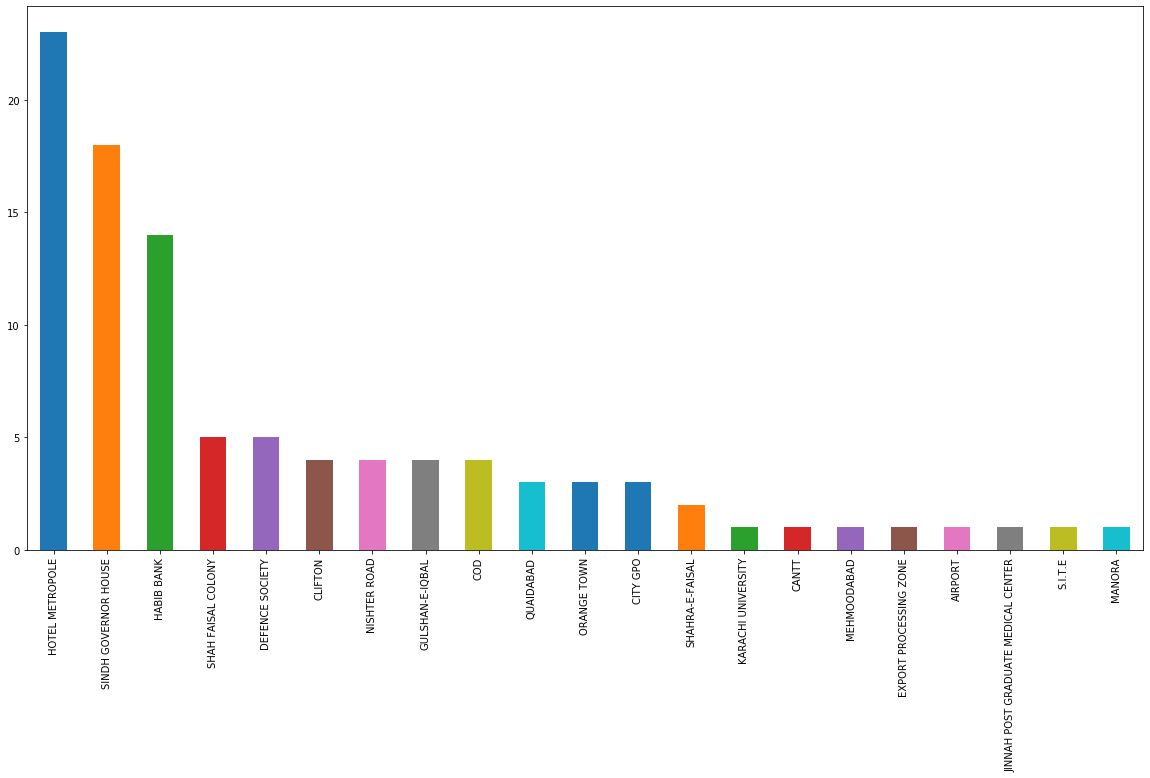

In [103]:
count.plot(kind="bar", figsize=(20,10))

# Conclusion

We can see that accoriding to the above data, the top 5 most popular areas in Karachi are Hotel Metropole, Sindh Governer House, Habib Bank, Shah Faisal Colony and Defence Society. 
Therefore, if one is looking for an area in Karachi to invest in property for a business/restaurant that has the most number of public places (to potentially attract most customers), it should be one of the five areas mentioned above. 